In [1]:
import numpy as np # linear algebra
import seaborn as sns
from sklearn import linear_model, metrics
from subprocess import check_output
import matplotlib
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

%matplotlib inline

df = pd.read_csv("fatal-police-shootings-data.csv")
df.head()
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5333,5815,TK TK,2020-05-20,shot,gun,NaN,M,NaN,Viera,FL,True,attack,Not fleeing,False
5334,5836,Michael Snyder,2020-05-24,shot,gun,44.0,M,NaN,Bulls Gap,TN,True,attack,Foot,False
5335,5837,Gary P. Dorton,2020-05-25,shot,knife,43.0,M,NaN,Jonesborough,TN,True,attack,Not fleeing,False
5336,5839,TK TK,2020-05-25,shot,gun,38.0,M,H,Houston,TX,False,attack,Not fleeing,False


Our dataset is regarding the police shootings in US, and we are trying to figure out if there is any racial bias.
Our dataset has 5338 rows. Some of the intersting colums are manner of death, threat level, and signs of mental illness.

In [2]:
cols = df.columns.size
rows = df.size

print(cols)
print(rows)

df.dtypes

14
74732


id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
dtype: object

The types of columns are mostly object, one is float, one is int, and one is bool.

In [3]:
# Adding total_population column with data corresponding to race

conditions = [df["race"]=="A", df["race"]=="W", df["race"]=="H", df["race"]=="B", df["race"]=="N", df["race"]=="O"]
numbers = [14674252, 223553265, 50477594, 38929319, 2932248, 22579629]

df["total_population"] = np.select(conditions, numbers, default="zero")

df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,total_population
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,14674252
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,223553265
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,50477594
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,223553265
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,50477594


We would like to investigate the relationship between age and gender with death, and figure out if there is any sort of bias or pattern.

Text(0.5, 1.0, 'Total number of people killed, by race')

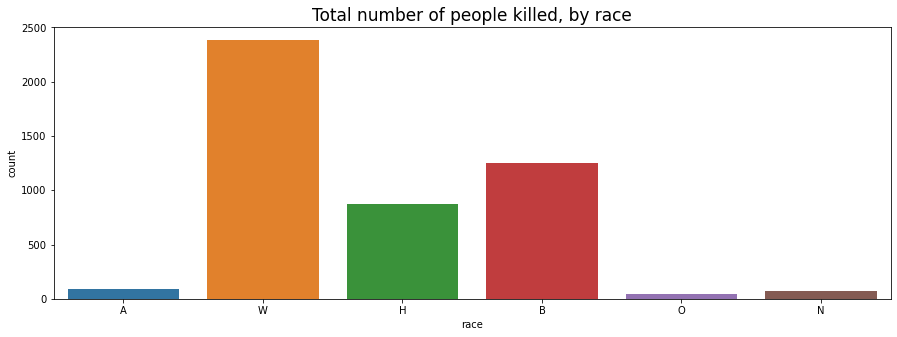

In [4]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x="race")

plt.title("Total number of people killed, by race", fontsize=17)

Through this bar graph, we see that people who are categorized as "White" are more likely to be killed during police shootings.

In [5]:
races = ["A", "W", "H", "B", "N", "O"]
killed_per_race = []

for i in races:
    i_killings = df.race.loc[(df.race==i)].count()
    killed_per_race.append(i_killings)
    
print (killed_per_race)

[91, 2385, 878, 1254, 76, 47]


In [6]:
prop_killed_per_race = []

for i in races:
    
    if i == "A":
        prop_i_killed = killed_per_race[0]/14674252.0
        print (prop_i_killed)
    elif i == "W":
        prop_i_killed = killed_per_race[1]/223553265.0
        print (prop_i_killed)
    elif i == "H":
        prop_i_killed = killed_per_race[2]/50477594.0
        print (prop_i_killed)
    elif i == "B":
        prop_i_killed = killed_per_race[3]/38929319.0
        print (prop_i_killed)
    elif i == "N":
        prop_i_killed = killed_per_race[4]/2932248.0
        print (prop_i_killed)
    else:
        prop_i_killed = killed_per_race[5]/22579629.0
        print (prop_i_killed)
    
    prop_killed_per_race.append(prop_i_killed)

6.201338235161833e-06
1.0668598376319845e-05
1.7393855974989617e-05
3.221222544375872e-05
2.591868082099468e-05
2.081522242903105e-06


<AxesSubplot:title={'center':'People killed as a proportion of their respective race'}>

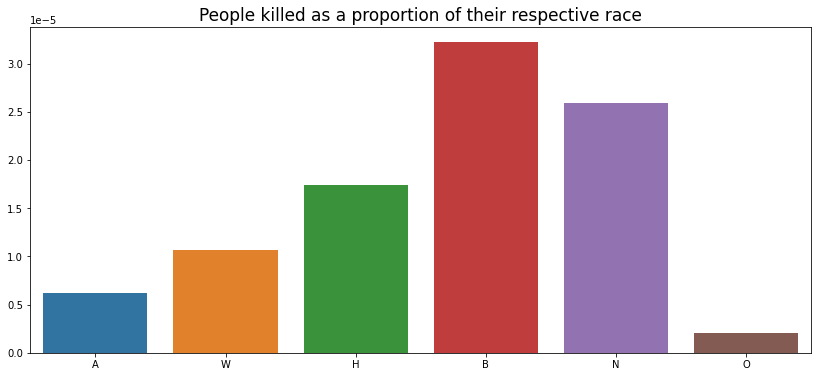

In [7]:
plt.figure(figsize=(14,6))
plt.title("People killed as a proportion of their respective race", fontsize=17)
sns.barplot(x=races, y=prop_killed_per_race)

However, here we see that black people are more likely to be killed during police shootings when taken as a proportion of their respective race.

95.61469265367316% of the victims are male.


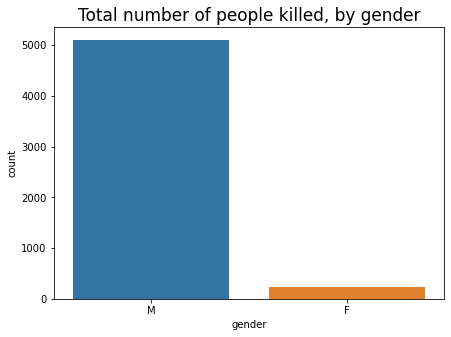

In [8]:
female = df[df["gender"] == "F"].gender.count()
male = df[df["gender"] == "M"].gender.count()
perc_male = (male*100)/(male+female) 

plt.figure(figsize=(7,5))
sns.countplot(data=df, x="gender")

plt.title("Total number of people killed, by gender", fontsize=17)

print (str(perc_male) + "% " + "of the victims are male.")

Furthermore, we can see that males are more prone to police shootings. One thing that strikes out is the huge difference between which race is more prone when we look at the number individually and then by proportion.

One column that I feel should be added is whether the person killed was related with a criminal or was a criminal himself/ herself. Learning about whether they were targeted legimately or not will turn out be very useful while investigating whether there is racial bias or not.

/usr/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age distribution')

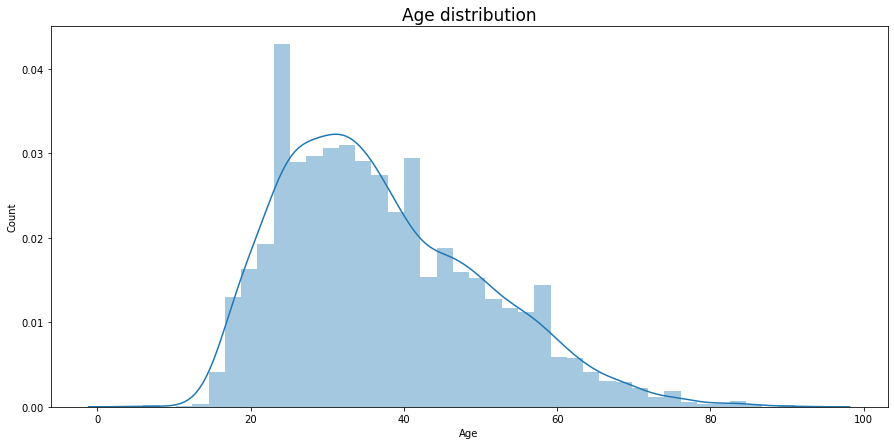

In [9]:
plt.figure(figsize=(15,7))
age_dist = sns.distplot(df["age"], bins=40)
age_dist.set(xlabel="Age", ylabel="Count")

plt.title("Age distribution", fontsize=17)

/usr/lib/python3.10/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Age distribution, by race')

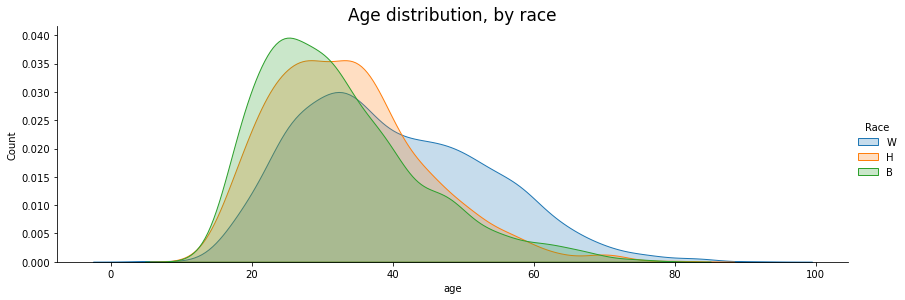

In [10]:
# First, create dataset with only Blacks, Whites, Hispanics

three_races = df.loc[(df["race"] == "B") | (df["race"] == "W") | (df["race"] == "H")]

g = sns.FacetGrid(data=three_races, hue="race", aspect=3, size=4)
g.map(sns.kdeplot, "age", shade=True)
g.add_legend(title="Race")


g.set_ylabels("Count")
plt.title("Age distribution, by race", fontsize=17)

In [11]:
avg_age_w = df.age[(df["race"] == "W")].mean() 
avg_age_b = df.age[(df["race"] == "B")].mean() 
avg_age_h = df.age[(df["race"] == "H")].mean() 

print ("Average age of white victims is " + str(avg_age_w))
print ("Average age of black victims is " + str(avg_age_b))
print ("Average age of hispanic victims is " + str(avg_age_h))

Average age of white victims is 39.908627284317895
Average age of black victims is 32.32006498781478
Average age of hispanic victims is 33.60257913247362


Text(0.5, 1.0, 'Number of police killings, by state')

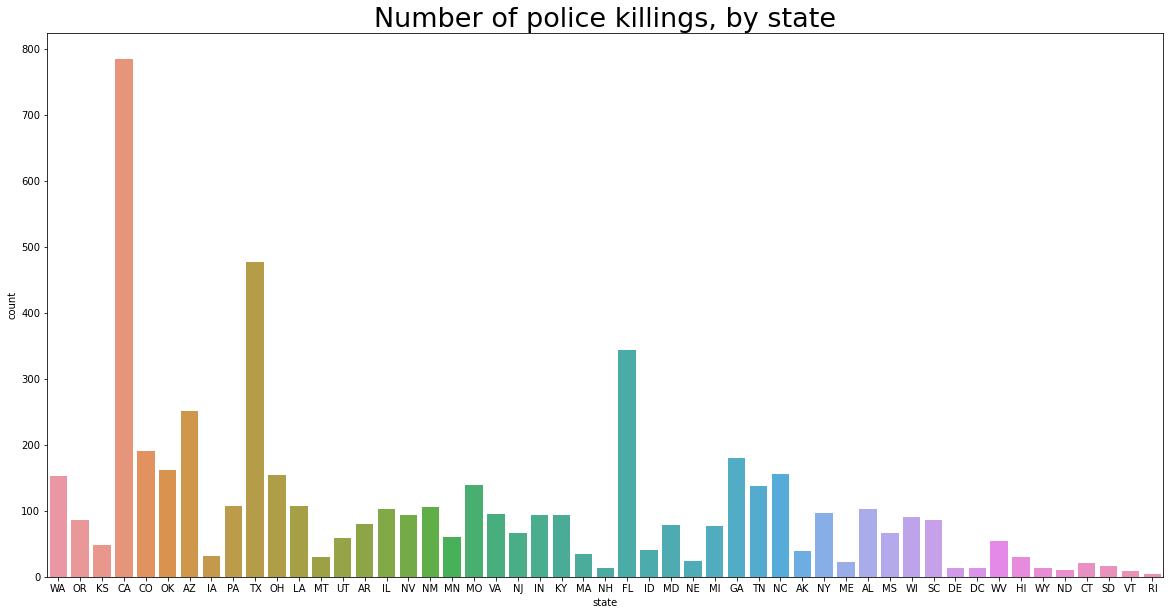

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x=df.state)
plt.title("Number of police killings, by state", fontsize=27)

Text(0.5, 1.0, 'Most dangerous cities')

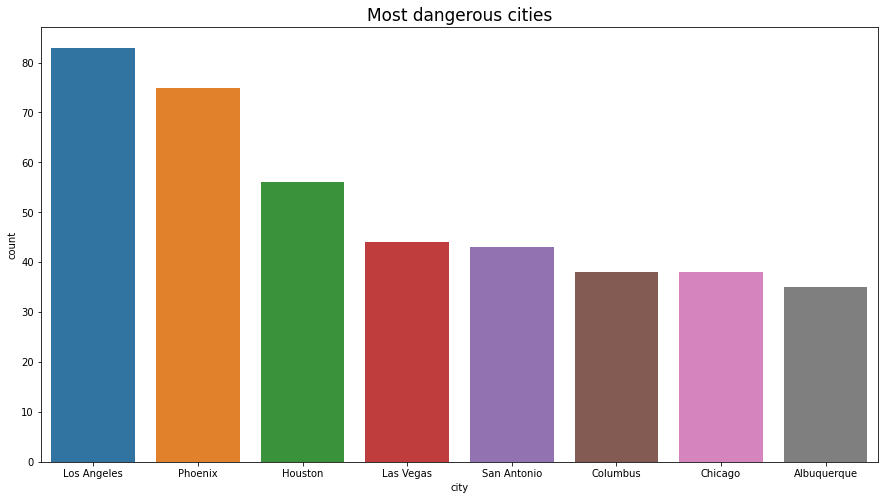

In [13]:
city = df.city.value_counts(ascending=False)

df_city = df.filter(["city"], axis=1)
df_city["count"] = 1

grouped_city = df_city.groupby("city", as_index=False,sort=False).sum()
grouped_city.sort_index(ascending=False)

grouped_city = grouped_city.sort_values("count", ascending=False).head(8)                                                       

plt.figure(figsize=(15,8))
sns.barplot(data=grouped_city, x="city", y="count")
plt.title("Most dangerous cities", fontsize=17)

Text(0.5, 1.0, 'Most common ways of being armed')

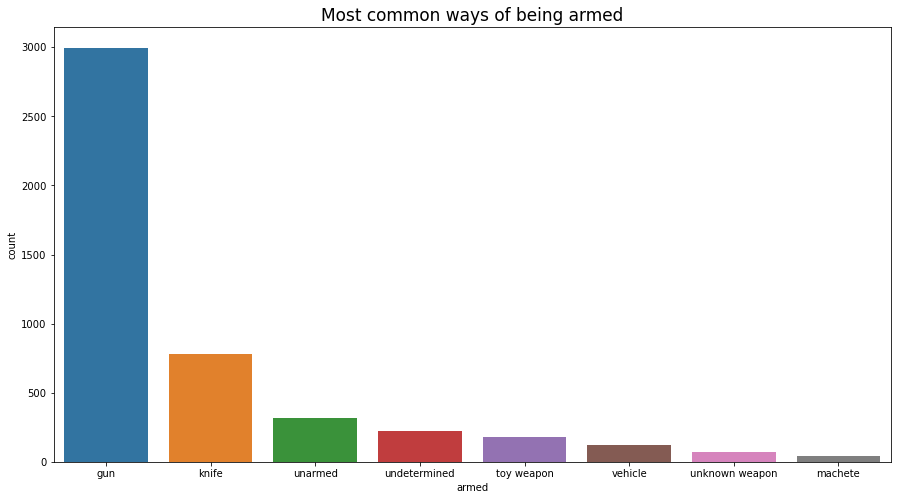

In [14]:
armed = df.armed.value_counts(ascending=False)

df_armed = df.filter(["armed"], axis=1)
df_armed["count"] = 1

grouped_armed = df_armed.groupby("armed", as_index=False,sort=False).sum()
grouped_armed.sort_index(ascending=False)

grouped_armed = grouped_armed.sort_values("count", ascending=False).head(8) 

plt.figure(figsize=(15,8))
sns.barplot(data=grouped_armed, x="armed", y="count")
plt.title("Most common ways of being armed", fontsize=17)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [16]:
df["signs_of_mental_illness"] = df["signs_of_mental_illness"].astype(int)
df["body_camera"] = df["body_camera"].astype(int)

# Using LabelEncoder to deal with categorical features

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(["armed", "race", "gender", "city", "state", "threat_level", "flee"])

LabelEncoder()

In [17]:
data_log = df.apply(LabelEncoder().fit_transform)

X = data_log
y = data_log["race"]
X.drop(["race", "date"], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [18]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
rfc_pred = rfc.predict(X_test)
rfc.feature_importances_

array([0.04073474, 0.04171813, 0.00213793, 0.01382703, 0.05566371,
       0.00189175, 0.02961544, 0.04542929, 0.00517614, 0.00676719,
       0.0095042 , 0.00368577, 0.74384867])

In [20]:
feature_data = pd.DataFrame({"feature_name": data_log.columns, "feature_importance": rfc.feature_importances_}) 
feature_data

,feature_name,feature_importance
0,id,0.040735
1,name,0.041718
2,manner_of_death,0.002138
3,armed,0.013827
4,age,0.055664
5,gender,0.001892
6,city,0.029615
7,state,0.045429
8,signs_of_mental_illness,0.005176
9,threat_level,0.006767


In [21]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.97      1.00      0.99       369
           2       1.00      1.00      1.00       265
           3       1.00      0.65      0.79        26
           4       1.00      0.82      0.90        11
           5       1.00      1.00      1.00       716
           6       1.00      1.00      1.00       190

    accuracy                           0.99      1602
   macro avg       1.00      0.92      0.95      1602
weighted avg       0.99      0.99      0.99      1602



In [22]:
from sklearn.metrics import accuracy_score

# Accuracy score
rf_accuracy_score = accuracy_score(y_test, rfc_pred)
rf_accuracy_score

0.9931335830212235